# beginning

In [1]:
#importing libraries
import pandas as pd
import numpy as np #mathematical operations on arrays
import seaborn as sns #visualization 
import matplotlib.pyplot as plt #heatmaps
import scipy.stats # scatterplots
from matplotlib.colors import ListedColormap
print("Setup complete")

Setup complete


In [2]:
#access to the shared csv/xlsx file. make sure to rerun 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading data
Covid = pd.read_excel("/content/drive/Shareddrives/Python Case Competition - Team 1/Python Competition Resources/COIVD-19 Cases Data.xlsx")


[link text](https://)1) Based on age and gender, is there any correlation between the symptom status? 

2)Are certain races more vulnerable to the disease based on age, sex and gender?


In [4]:
print(Covid.columns)

Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity', 'process',
       'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
       'death_yn'],
      dtype='object')


In [5]:
Age = Covid["age_group"].unique()
print(Age)

[nan '18 to 49 years' '50 to 64 years' '65+ years' '0 - 17 years'
 'Missing']


In [6]:
Race = Covid["race"].unique()
print(Race)

[nan 'Unknown' 'Black' 'White' 'Asian' 'Missing'
 'American Indian/Alaska Native' 'Multiple/Other'
 'Native Hawaiian/Other Pacific Islander']


In [7]:
Sex = Covid["sex"].unique()
print(Sex)

[nan 'Female' 'Male' 'Unknown' 'Missing']


In [8]:
Sym = Covid["symptom_status"].unique()
print(Sym)

['Missing' 'Symptomatic' 'Asymptomatic' 'Unknown' nan]


# q1 dataframe

In [9]:
Q1Corr1 = Covid[["sex","age_group","symptom_status"]]
Q1Corr1 = Q1Corr1.dropna() # drops none values
display(Q1Corr1)
Q1 = Q1Corr1.value_counts()

,sex,age_group,symptom_status
45,Female,18 to 49 years,Missing
46,Female,18 to 49 years,Symptomatic
47,Female,18 to 49 years,Symptomatic
48,Female,18 to 49 years,Symptomatic
49,Female,18 to 49 years,Symptomatic
...,...,...,...
507908,Male,0 - 17 years,Missing
507909,Male,65+ years,Missing
507910,Female,0 - 17 years,Symptomatic
507911,Male,18 to 49 years,Missing


In [10]:
Filter = Q1Corr1.loc[(Q1Corr1["sex"] != "Missing") & (Q1Corr1["sex"] != "Unknown")& (Q1Corr1["symptom_status"] != "Missing")&(Q1Corr1["symptom_status"] != "Unknown")& (Q1Corr1["age_group"] != "Missing")]

In [11]:
#general ammt of symtomatic and asymtomatic ppl
SymAmmt = Filter[["symptom_status"]]
SymAmmt.value_counts()


symptom_status
Symptomatic       227680
Asymptomatic        7700
dtype: int64

In [12]:
#general ammt of female and male
GenAmmt = Filter[["sex"]]
GenAmmt.value_counts()

sex   
Female    123432
Male      111948
dtype: int64

In [13]:
#general ammt of age_groups with covid
GenAge = Filter[["age_group"]]
GenAge.value_counts().sort_index(ascending=True)


age_group     
0 - 17 years       40323
18 to 49 years    128297
50 to 64 years     39056
65+ years          27704
dtype: int64



---



In [14]:
#ammt of symtomatic ppl by age and gender
Q1Corr2 = Q1Corr1.loc[(Q1Corr1["symptom_status"] == "Symptomatic") &(Q1Corr1["sex"] != "Missing") & (Q1Corr1["sex"] != "Unknown") & (Q1Corr1["age_group"] != "Missing")].sort_values(by=["age_group","sex"])
print(Q1Corr2)
SymCount = Q1Corr2.value_counts()
print(SymCount)

           sex     age_group symptom_status
3933    Female  0 - 17 years    Symptomatic
3943    Female  0 - 17 years    Symptomatic
3946    Female  0 - 17 years    Symptomatic
3951    Female  0 - 17 years    Symptomatic
3962    Female  0 - 17 years    Symptomatic
...        ...           ...            ...
507664    Male     65+ years    Symptomatic
507688    Male     65+ years    Symptomatic
507710    Male     65+ years    Symptomatic
507754    Male     65+ years    Symptomatic
507775    Male     65+ years    Symptomatic

[227680 rows x 3 columns]
sex     age_group       symptom_status
Female  18 to 49 years  Symptomatic       66260
Male    18 to 49 years  Symptomatic       58607
        0 - 17 years    Symptomatic       19907
Female  50 to 64 years  Symptomatic       19572
        0 - 17 years    Symptomatic       18311
Male    50 to 64 years  Symptomatic       18288
Female  65+ years       Symptomatic       15406
Male    65+ years       Symptomatic       11329
dtype: int64


In [15]:
SymGenAmmt = Q1Corr2[["sex"]]
SVSex = list(SymGenAmmt["sex"].unique())
SVS =SymGenAmmt.value_counts()
print(SVS)

sex   
Female    119549
Male      108131
dtype: int64




---







In [16]:
#ammt of asymtomatic ppl by age and gender
Q1Corr3 = Q1Corr1.loc[(Q1Corr1["symptom_status"] == "Asymptomatic") &(Q1Corr1["sex"] != "Missing") & (Q1Corr1["sex"] != "Unknown") & (Q1Corr1["age_group"] != "Missing")].sort_values(by=["age_group"]).sort_values(by=["age_group","sex"])
print(Q1Corr3)
AsymCount = Q1Corr3.value_counts()
print(AsymCount)

           sex     age_group symptom_status
87850   Female  0 - 17 years   Asymptomatic
286536  Female  0 - 17 years   Asymptomatic
88133   Female  0 - 17 years   Asymptomatic
88206   Female  0 - 17 years   Asymptomatic
88223   Female  0 - 17 years   Asymptomatic
...        ...           ...            ...
130288    Male     65+ years   Asymptomatic
248851    Male     65+ years   Asymptomatic
248868    Male     65+ years   Asymptomatic
249069    Male     65+ years   Asymptomatic
249142    Male     65+ years   Asymptomatic

[7700 rows x 3 columns]
sex     age_group       symptom_status
Female  18 to 49 years  Asymptomatic      1743
Male    18 to 49 years  Asymptomatic      1687
        0 - 17 years    Asymptomatic      1114
Female  0 - 17 years    Asymptomatic       991
Male    50 to 64 years  Asymptomatic       628
Female  65+ years       Asymptomatic       581
        50 to 64 years  Asymptomatic       568
Male    65+ years       Asymptomatic       388
dtype: int64


In [17]:
AsymGenAmmt = Q1Corr3[["sex"]]
print(AsymGenAmmt)
AVSex = list(AsymGenAmmt["sex"].unique())
AVS = AsymGenAmmt.value_counts()
print(AVS)

           sex
87850   Female
286536  Female
88133   Female
88206   Female
88223   Female
...        ...
130288    Male
248851    Male
248868    Male
249069    Male
249142    Male

[7700 rows x 1 columns]
sex   
Female    3883
Male      3817
dtype: int64


In [18]:
SymAgeAmmt = Q1Corr2[["age_group"]]
SVAge = list(SymAgeAmmt["age_group"].unique())
SVA = SymAgeAmmt.value_counts().sort_index(ascending=True)
print(SVA)
print(SVAge)

age_group     
0 - 17 years       38218
18 to 49 years    124867
50 to 64 years     37860
65+ years          26735
dtype: int64
['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years']


In [19]:
AsymAgeAmmt = Q1Corr3[["age_group"]]
AVAge = list(AsymAgeAmmt["age_group"].unique())
AVA = AsymAgeAmmt.value_counts().sort_index(ascending=True)
print(AVAge)
print(AVA)

['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years']
age_group     
0 - 17 years      2105
18 to 49 years    3430
50 to 64 years    1196
65+ years          969
dtype: int64


In [20]:
FAsym = Q1Corr3.loc[(Q1Corr3["sex"] == "Female")]
FAsyml = list(FAsym["age_group"].unique())
FAsymCount = FAsym.value_counts().sort_index(ascending=True)
print(FAsymCount)
print(FAsyml)

sex     age_group       symptom_status
Female  0 - 17 years    Asymptomatic       991
        18 to 49 years  Asymptomatic      1743
        50 to 64 years  Asymptomatic       568
        65+ years       Asymptomatic       581
dtype: int64
['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years']


In [21]:
MAsym = Q1Corr3.loc[(Q1Corr3["sex"] == "Male")]
MAsyml = list(MAsym["age_group"].unique())
MAsymCount = MAsym.value_counts().sort_index(ascending=True)
print(MAsymCount)
print(MAsyml)

sex   age_group       symptom_status
Male  0 - 17 years    Asymptomatic      1114
      18 to 49 years  Asymptomatic      1687
      50 to 64 years  Asymptomatic       628
      65+ years       Asymptomatic       388
dtype: int64
['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years']


In [22]:
FSym = Q1Corr2.loc[Q1Corr2["sex"] == "Female"]
FSyml = list(FSym["age_group"].unique())
FSymCount = FSym.value_counts().sort_index(ascending=True)
print(FSymCount)
print(FSyml)

sex     age_group       symptom_status
Female  0 - 17 years    Symptomatic       18311
        18 to 49 years  Symptomatic       66260
        50 to 64 years  Symptomatic       19572
        65+ years       Symptomatic       15406
dtype: int64
['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years']


In [23]:
MSym = Q1Corr2.loc[(Q1Corr2["sex"] == "Male")]
MSyml = list(MSym["age_group"].unique())
MSymCount = MSym.value_counts().sort_index(ascending=True)
print(MSymCount)
print(MSyml)

sex   age_group       symptom_status
Male  0 - 17 years    Symptomatic       19907
      18 to 49 years  Symptomatic       58607
      50 to 64 years  Symptomatic       18288
      65+ years       Symptomatic       11329
dtype: int64
['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years']


#Count Plot

In [24]:
plt.rcParams["figure.figsize"] = [7,7]
plt.rcParams["figure.autolayout"] = True

(0.0, 70000.0)

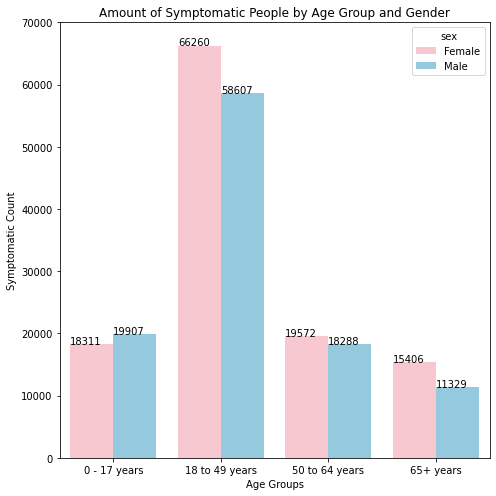

In [25]:
#symptomatic by age and gender
ax = sns.countplot(x="age_group", hue="sex", data=Q1Corr2, palette=["pink", "skyblue"])
ax.set(xlabel="Age Groups",ylabel='Symptomatic Count',title='Amount of Symptomatic People by Age Group and Gender')
for p in ax.patches:
   ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0, p.get_height()+1))
plt.ylim(0, 70000)


(0.0, 5000.0)

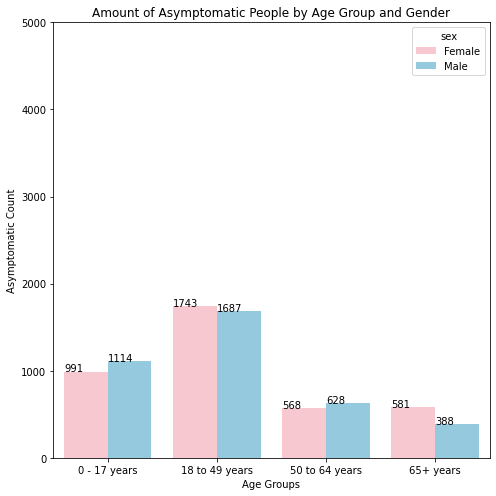

In [26]:
#asymptomatic by age and gender
ax = sns.countplot(x="age_group", hue="sex", data=Q1Corr3, palette=["pink", "skyblue"])
ax.set(xlabel="Age Groups",ylabel='Asymptomatic Count', title='Amount of Asymptomatic People by Age Group and Gender')
for p in ax.patches:
   ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0, p.get_height()+1))
plt.ylim(0, 5000)

# pie charts

In [27]:
plt.rcParams["figure.figsize"] = [3.5,3.5]
plt.rcParams["figure.autolayout"] = True

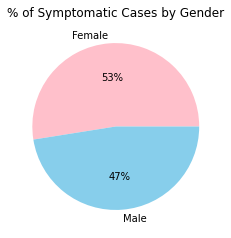

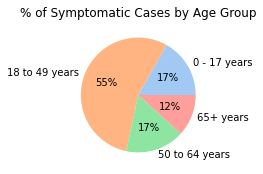

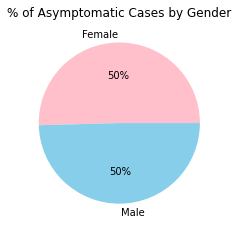

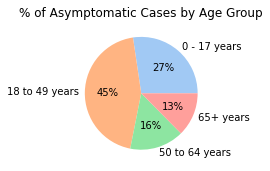

In [28]:
plt.pie(SVS, labels=SVSex, colors=["pink", "skyblue"], autopct = '%0.0f%%')
plt.title('% of Symptomatic Cases by Gender')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(SVA, labels=SVAge,colors = colors, autopct = '%0.0f%%')
plt.title('% of Symptomatic Cases by Age Group')

plt.show()

plt.pie(AVS, labels=AVSex, colors=["pink", "skyblue"], autopct = '%0.0f%%')
plt.title('% of Asymptomatic Cases by Gender')
plt.show()


plt.pie(AVA, labels=AVAge,colors = colors, autopct = '%0.0f%%')
plt.title('% of Asymptomatic Cases by Age Group')

plt.show()

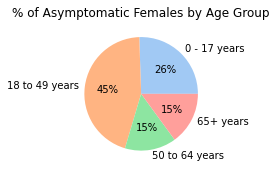

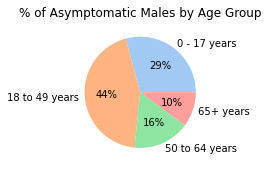

In [29]:
plt.pie(FAsymCount, labels=FAsyml, colors = colors, autopct = '%0.0f%%')
plt.title('% of Asymptomatic Females by Age Group')

plt.show()

plt.pie(MAsymCount, labels=MAsyml, colors = colors, autopct = '%0.0f%%')
plt.title('% of Asymptomatic Males by Age Group')
plt.show()


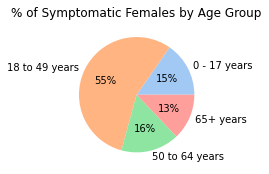

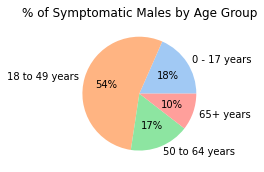

In [30]:
 
plt.pie(FSymCount, labels=FSyml, colors = colors, autopct = '%0.0f%%')
plt.title('% of Symptomatic Females by Age Group')
plt.show()

plt.pie(MSymCount, labels=MSyml, colors = colors, autopct = '%0.0f%%')
plt.title('% of Symptomatic Males by Age Group')
plt.show()
